# Observable Trends

-Urban cities have the lowest average fare with the highest number of rides, propably caused by the high number of drivers in the area.

-The market share is unequal.

-Rural cities have the highest average fare probably due to long distances rides and urban the lowest because usually distances are shorter in metro cities. 



In [2]:
# Magic function to display the plots in line and stored in the notebook document
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load 
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_df = pd.merge(ride_data, city_data, on="city", how="left")

# Display the data table for preview
pyber_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

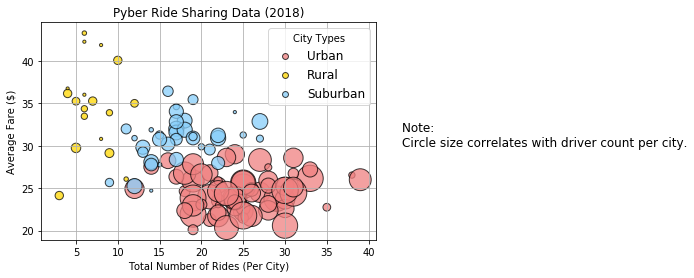

In [3]:
# Obtain the x and y coordinates for each of the three city types

urban_city_type = pyber_df[pyber_df["type"] == "Urban"].groupby([pyber_df["city"]])
rural_city_type = pyber_df[pyber_df["type"] == "Rural"].groupby([pyber_df["city"]])
suburban_city_type = pyber_df[pyber_df["type"] == "Suburban"].groupby([pyber_df["city"]])

urban_x = urban_city_type["ride_id"].count()
urban_y = urban_city_type["fare"].mean()
urban_s = urban_city_type["driver_count"].mean()

rural_x = rural_city_type["ride_id"].count()
rural_y = rural_city_type["fare"].mean()
rural_s = rural_city_type["driver_count"].mean()

suburban_x = suburban_city_type["ride_id"].count()
suburban_y = suburban_city_type["fare"].mean()
suburban_s = suburban_city_type["driver_count"].mean()

# Build the scatter plots for each city types

plt.scatter(urban_x, urban_y, label = "Urban", linewidth = 1.0, s= urban_s * 10, color=["lightcoral"], edgecolor="black",alpha = 0.75, marker= "o")
plt.scatter(rural_x, rural_y, label = "Rural", linewidth = 1.0, s= rural_s * 10, color=["gold"], edgecolor="black",alpha = 0.75, marker= "o")   
plt.scatter(suburban_x, suburban_y, label = "Suburban", linewidth = 1.0, s= suburban_s *10, color=["lightskyblue"], edgecolor="black",alpha = 0.75, marker= "o")  
plt.grid()      

# Incorporate the other graph properties
            
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)") 
plt.title("Pyber Ride Sharing Data (2018)")
            
# Create a legend
legend = plt.legend(fontsize = 12, title = "City Types", loc = "best")
legend.legendHandles[0]._sizes = [35]
legend.legendHandles[1]._sizes = [35]   
legend.legendHandles[2]._sizes = [35]   

# Incorporate a text label regarding circle size

plt.text(44, 30, "Note: \nCircle size correlates with driver count per city.", fontsize = 12)  
            
# Save Figure

plt.savefig("data/Pyber_ride_sharing.png", bbox_inches = "tight")  

# Show plot

plt.show()

## Total Fares by City Type

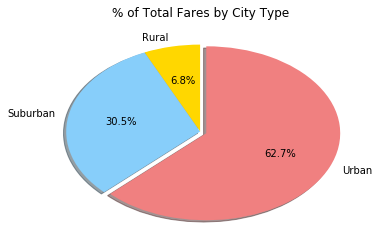

In [4]:
# Calculate Type Percents

type_all = pyber_df.groupby(["type"])
fares_sum = type_all["fare"].sum()
# Build Pie Chart

labels = ["Rural", "Suburban", "Urban"]
explode = (0, 0, 0.05)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(fares_sum, explode = explode, labels = labels, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 90)
plt.title("% of Total Fares by City Type")

# Save Figure

plt.savefig("data/Total_fares_city_type.png")

# Show Figure

plt.show()


## Total Rides by City Type

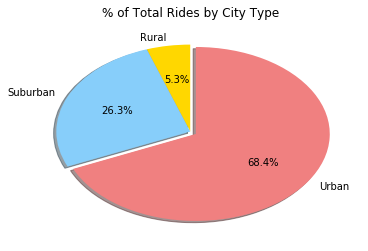

In [8]:
# Calculate Ride Percents

rides_total = type_all["ride_id"].count()

# Build Pie Chart.count

labels = ["Rural", "Suburban", "Urban"]
explode = (0, 0, 0.05)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(rides_total, explode = explode, labels = labels, colors = colors, autopct = "%1.1f%%", shadow = True,startangle = 90)
plt.title("% of Total Rides by City Type")

# Save Figure

plt.savefig("data/Total_rides_city_type.png")

# Show Figure

plt.show()


## Total Drivers by City Type

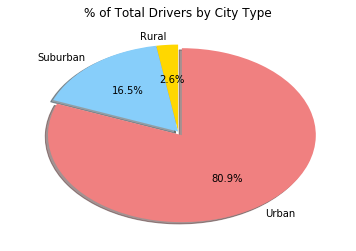

In [9]:
# Calculate Driver Percents

total_all_d = city_data.groupby(["type"])
drivers_c = total_all_d["driver_count"].sum()

# Build Pie Charts

labels = ["Rural", "Suburban", "Urban"]
explode = (0, 0, 0.05)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(drivers_c, explode = explode, labels = labels, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 90)
plt.title("% of Total Drivers by City Type")

# Save Figure

plt.savefig("data/Total_drivers_by_city_type.png")

# Show Figure

plt.show()

